In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# 2.Load Dataset
data = pd.read_csv("viettri_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2019,44,17,29,2,9,4
1,3/2/2019,65,37,27,4,12,4
2,3/3/2019,81,38,2,1,1,2
3,3/4/2019,51,24,21,4,8,1
4,3/5/2019,43,7,23,1,12,4
...,...,...,...,...,...,...,...
1915,5/28/2024,38,24,35,1,15,5
1916,5/29/2024,38,17,41,7,15,10
1917,5/30/2024,28,8,11,1,15,1
1918,5/31/2024,12,12,16,1,16,7


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1920 non-null   object
 1   pm25    1920 non-null   int64 
 2   pm10    1920 non-null   int64 
 3   o3      1920 non-null   int64 
 4   no2     1920 non-null   int64 
 5   so2     1920 non-null   int64 
 6   co      1920 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 105.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,42.395313,22.470833,17.391667,7.528125,9.497917,3.961979
std,31.665288,16.124166,12.907283,4.971229,6.526731,2.516048
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,10.000000,8.750000,3.000000,4.000000,2.000000
50%,35.000000,20.000000,15.000000,7.000000,9.000000,4.000000
75%,59.000000,32.000000,24.000000,11.000000,14.000000,6.000000
max,178.000000,94.000000,114.000000,35.000000,27.000000,22.000000


In [4]:
#Chọn thuộc tính
data = data[['pm25']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25
0,44
1,65
2,81
3,51
4,43
...,...
1915,38
1916,38
1917,28
1918,12


<Axes: >

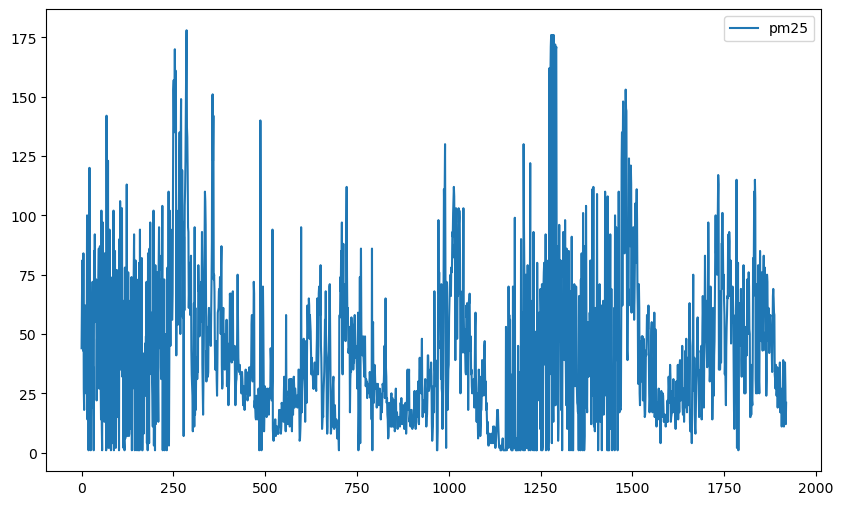

In [5]:
data.plot(figsize=(10,6))

In [6]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 7:3
train_size = int(0.8 * len(data))
test_size = int(0.2 * len(data))

# Chia dữ liệu thành các tập
train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))


Train data size: 1536
Test data size: 384


In [7]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['pm25'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14450.190, Time=4.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15067.014, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14747.654, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14485.083, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15065.015, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14448.211, Time=2.68 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14461.512, Time=0.95 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14455.783, Time=0.90 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14450.189, Time=3.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=14453.484, Time=1.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14450.311, Time=1.33 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=14451.850, Time=4.29 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=14446.219, Time=1.59 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=14459.527, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [8]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(n_periods=len(y_test))


In [9]:
# 4. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index + 1, stop=last_index+31, step=1)

# Tạo mảng 30 ngày 
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán 30 ngày tiếp theo
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# # In ra dự đoán giá trong 30 ngày tiếp theo
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[32.60610351 35.8546644  37.89868146 39.18479117 39.99402033 40.50319293
 40.82356786 41.02514999 41.15198687 41.23179351 41.2820084  41.31360396
 41.33348411 41.34599283 41.35386341 41.35881563 41.3619316  41.3638922
 41.36512581 41.36590201 41.3663904  41.3666977  41.36689106 41.36701272
 41.36708927 41.36713743 41.36716774 41.36718681 41.36719881 41.36720636]


In [10]:
# 5. Tính RMSE
test_rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print('Testing RMSE:', test_rmse)

# 6. Tính MAPE
test_mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
print('\nTesting MAPE:', test_mape)

# 7. Tính MAE
test_mae = np.mean(np.abs(y_test - y_pred))
print("\nMAE:", test_mae)

Testing RMSE: 23.918340541570007

Testing MAPE: 89.73027565515685

MAE: 19.57807335838231


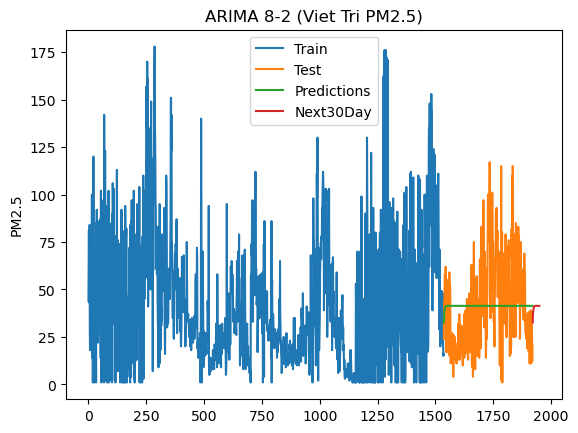

In [11]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.title('ARIMA 8-2 (Viet Tri PM2.5)')
plt.ylabel('PM2.5')
plt.show()

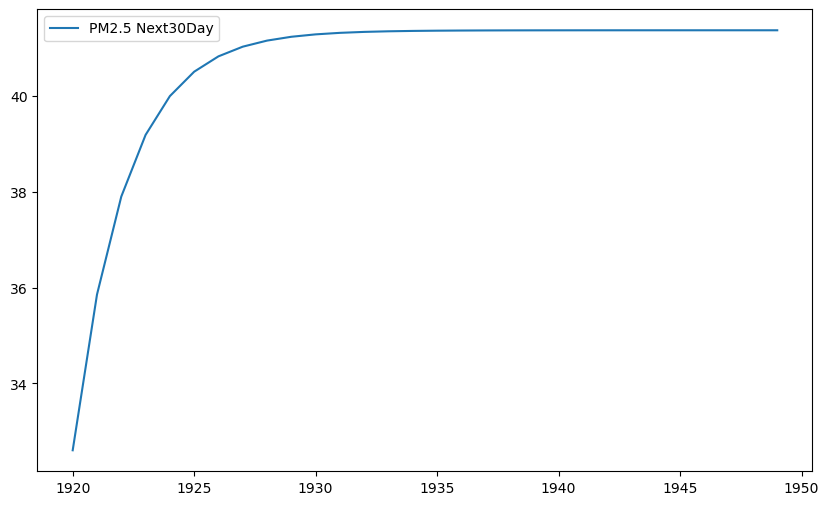

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(last_data,y_next_30_days)
plt.legend(['PM2.5 Next30Day'])
plt.show()

In [13]:
test_data.index

RangeIndex(start=1536, stop=1920, step=1)